# Đọc dữ liệu

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Yêu cầu 1.3

In [58]:
data = pd.read_csv('train.csv')

In [59]:
print('Số dòng:', data.shape[0])
print('Các cột:')
print(np.array(data.columns))

Số dòng: 1647
Các cột:
['Make' 'Model' 'Price' 'Year' 'Kilometer' 'Fuel Type' 'Transmission'
 'Location' 'Color' 'Owner' 'Seller Type' 'Engine' 'Max Power'
 'Max Torque' 'Drivetrain' 'Length' 'Width' 'Height' 'Seating Capacity'
 'Fuel Tank Capacity']


In [60]:
print('5 Dòng đầu tiên của data:')
data.head()

5 Dòng đầu tiên của data:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


# Data preprocessing

## Tách các cột

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   object 
 12  Max Power           1582 non-null   object 
 13  Max Torque          1582 non-null   object 
 14  Drivetrain          1536 non-null   object 
 15  Length              1595 non-null   float64
 16  Width 

In [62]:
data["Engine"] = data["Engine"].str.replace(' cc', '', regex=False).astype(float)

In [63]:
def extract_max_power(power_str):
    if isinstance(power_str, float):
        return np.nan, np.nan
    parts = power_str.split('@')
    bhp_part = parts[0]
    rpm_part = parts[1]
    bhp_value = float(bhp_part.split(' bhp')[0])
    try:
        rpm_value = float(rpm_part.split(' rpm')[0])
    except:
        return bhp_value, np.nan
    return bhp_value, rpm_value

data[['Max Power bhp', 'Max Power rpm']] = data['Max Power'].apply(lambda x: pd.Series(extract_max_power(x)))
data.drop(columns=['Max Power'], inplace=True)

In [64]:
def extract_max_power(power_str):
    if isinstance(power_str, float):
        return np.nan, np.nan
    parts = power_str.split('@')
    bhp_part = parts[0]
    rpm_part = parts[1]
    bhp_value = float(bhp_part.split(' Nm')[0])
    try:
        rpm_value = float(rpm_part.split(' rpm')[0])
    except:
        return bhp_value, np.nan
    return bhp_value, rpm_value

data[['Max Torque Nm', 'Max Torque rpm']] = data['Max Torque'].apply(lambda x: pd.Series(extract_max_power(x)))
data.drop(columns=['Max Torque'], inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   float64
 12  Drivetrain          1536 non-null   object 
 13  Length              1595 non-null   float64
 14  Width               1595 non-null   float64
 15  Height              1595 non-null   float64
 16  Seatin

## in4 Filling

In [66]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

## Encoding categorical features

In [67]:
cata_col = list(data.select_dtypes(include=['object']).columns)
cata_col

['Make',
 'Model',
 'Fuel Type',
 'Transmission',
 'Location',
 'Color',
 'Owner',
 'Seller Type',
 'Drivetrain']

In [68]:
# Fule type encoding
threshold = 50
rare = data['Fuel Type'].value_counts()[lambda x: x < threshold].index
data['Fuel Type'] = data['Fuel Type'].apply(lambda x: x if x not in rare else 'Other')

In [69]:
# Owner encoding
data["Owner"] = data["Owner"].map({
    "UnRegistered Car": 0,
    "First": 1,
    "Second": 2,
    "Third": 3,
    "Fourth": 4,
    "4 or More": 4
})

# Visualizing

## Hiển thị các Correlation có abs > 0.3

In [70]:
# drop Kilometer = 2e6
data = data.drop(data[data["Kilometer"] == 2e6].index)

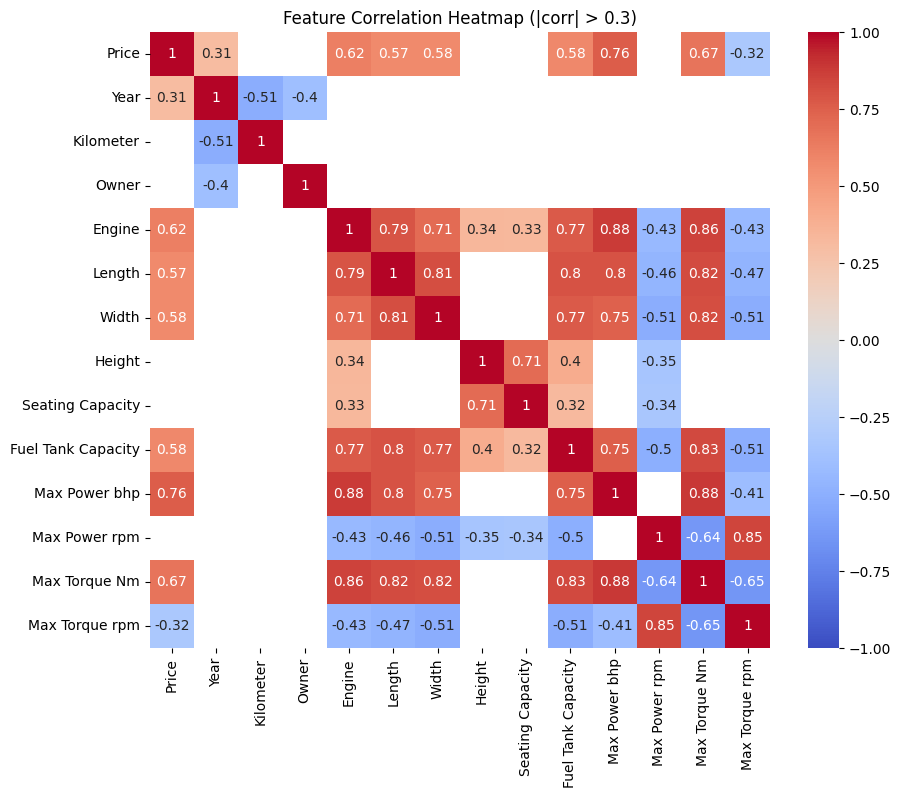

In [71]:
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_data.corr()
filtered_corr = corr_matrix[abs(corr_matrix) > 0.3]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.title("Feature Correlation Heatmap (|corr| > 0.3)")
plt.show()

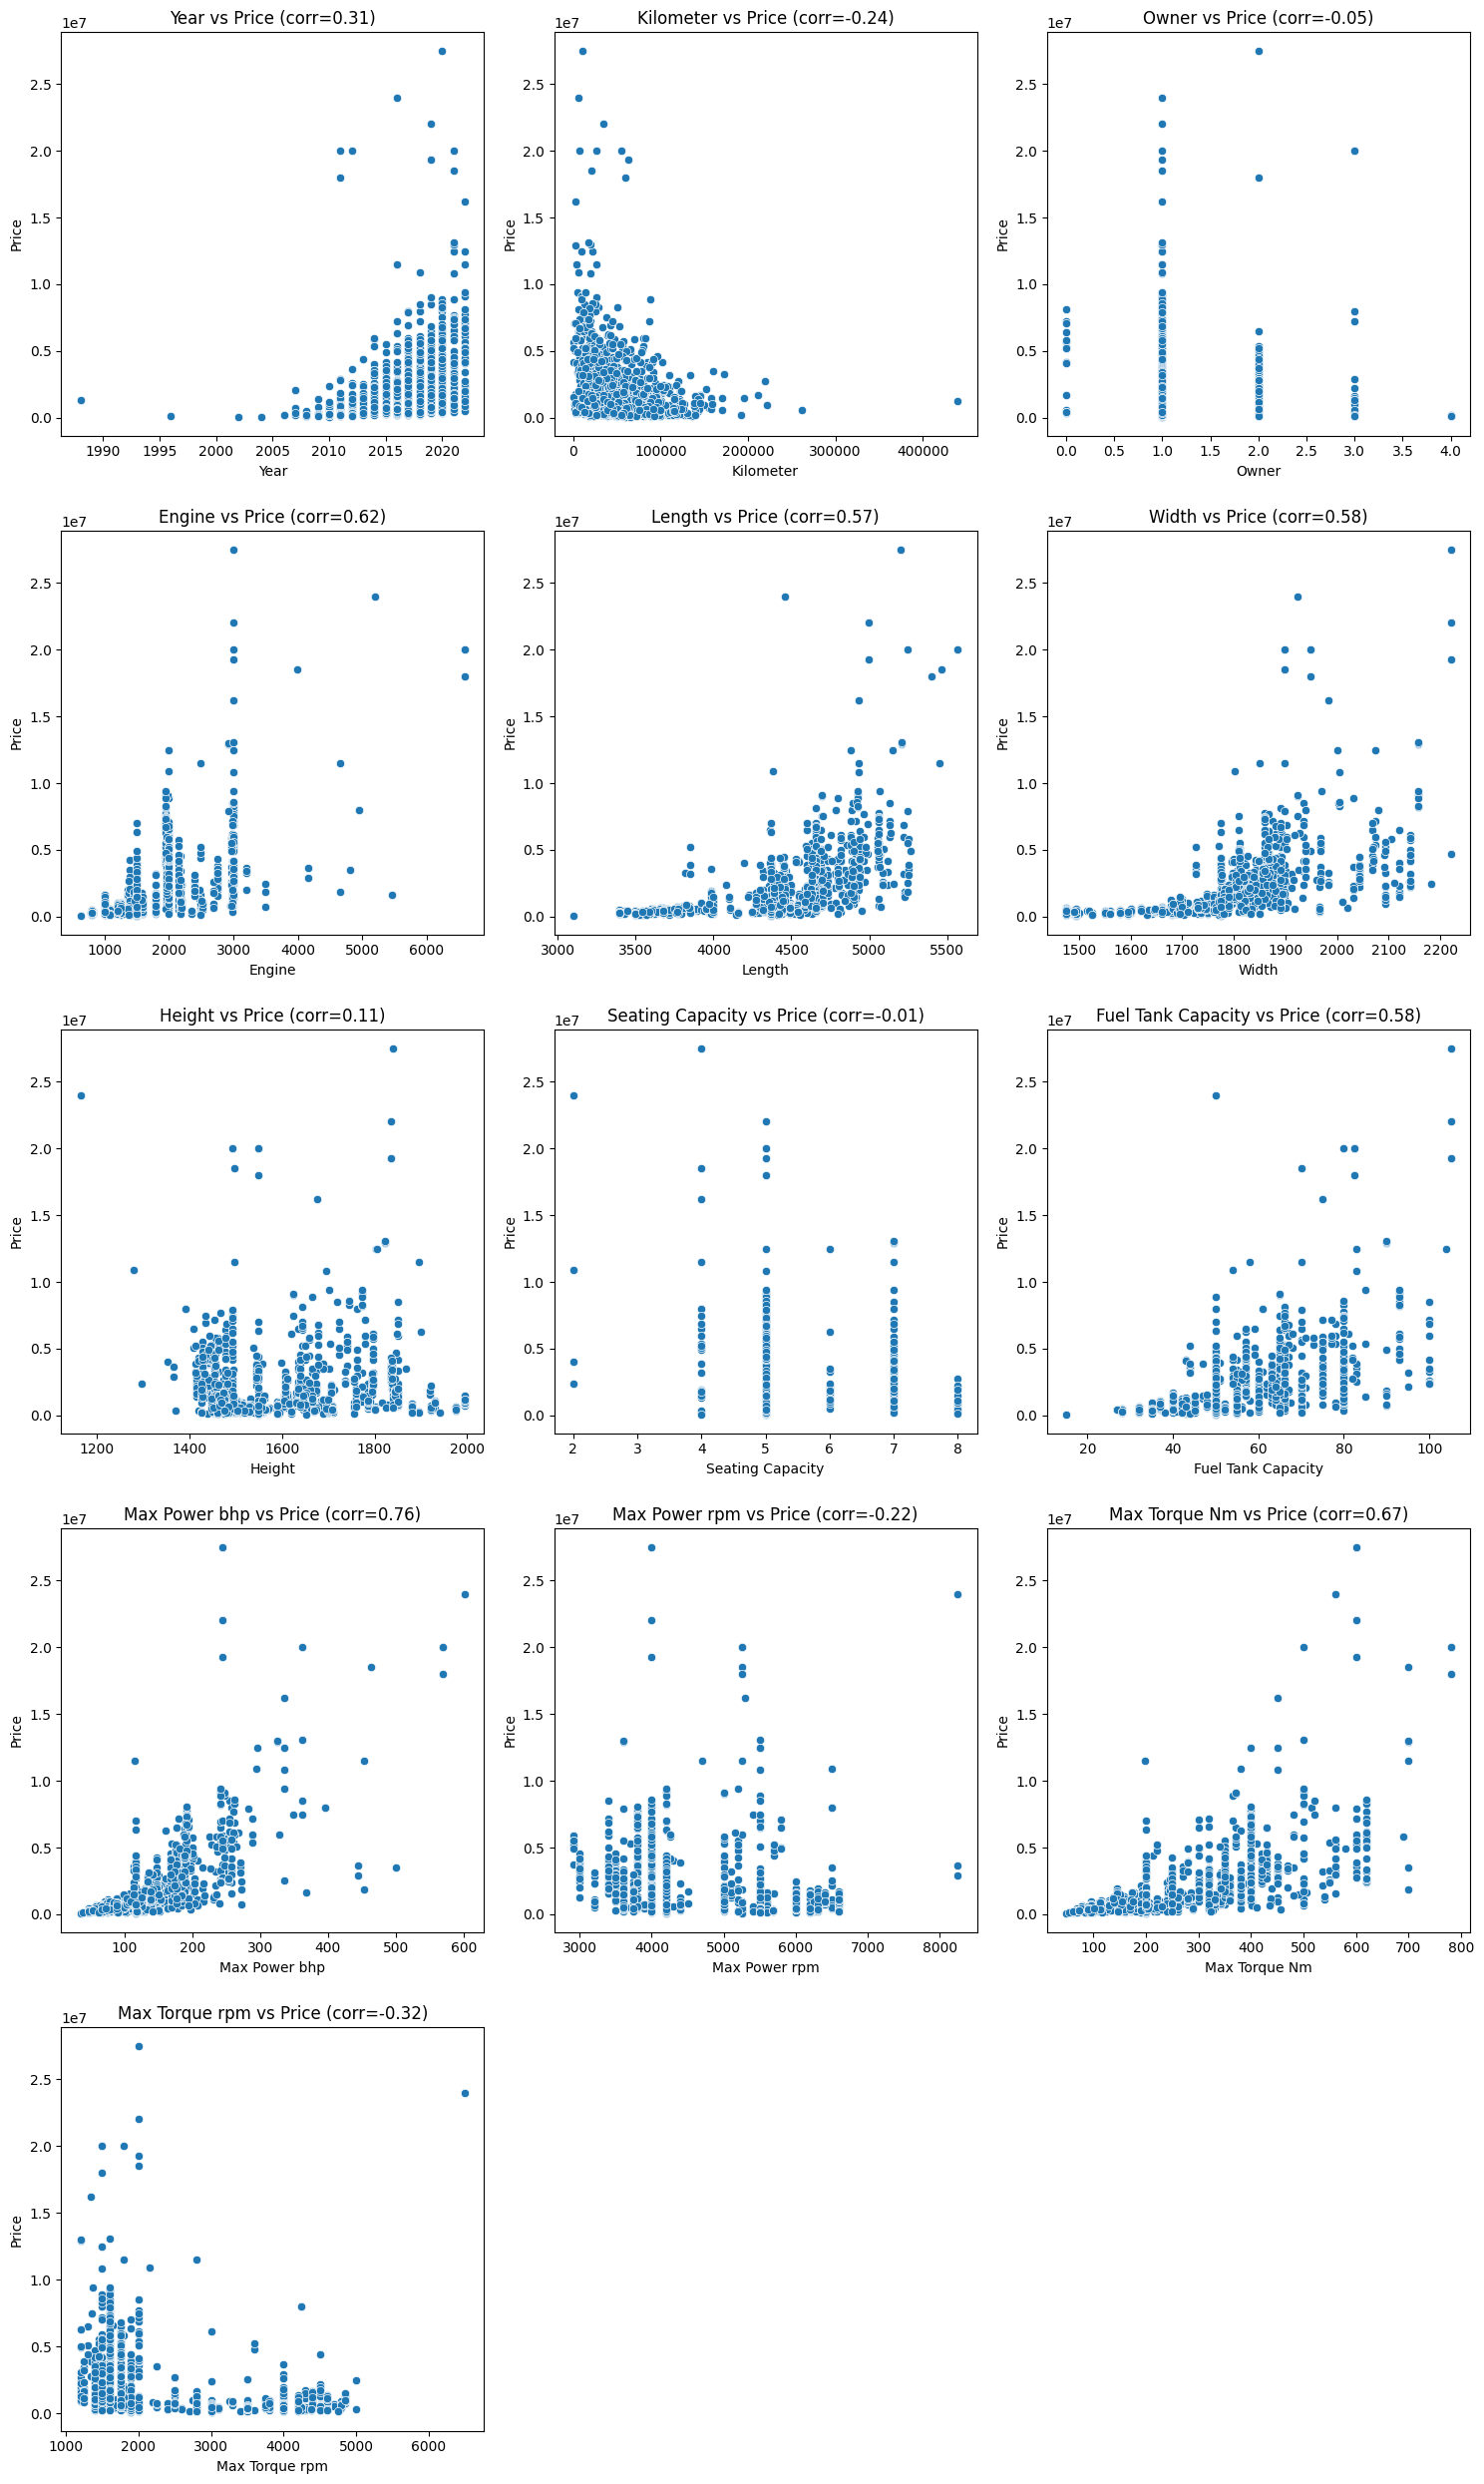

In [72]:
import math
correlations = numeric_data.corr()["Price"]
num_cols = [col for col in numeric_data.columns if col != "Price"]

num_plots = len(num_cols)
cols_per_row = 3  
num_rows = math.ceil(num_plots / cols_per_row) 

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5 * cols_per_row, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    corr_value = correlations[col]
    sns.scatterplot(x=numeric_data[col], y=numeric_data["Price"], ax=axes[i])
    axes[i].set_title(f"{col} vs Price (corr={corr_value:.2f})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()